# Scale Free

In [1]:
from SubTempNet import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [20]:
N = [100]
gamma = [1.6,2,2.4,2.8,3.2]
S = [150]
T = 10000

In [14]:
#Create Temporal networks
for n in N:
    for s in S:
        for g in gamma:
            for rep in range(10):
                name = "data/SF/SF_n"+str(n)+"_g"+ "{}".format(g)+"_T"+str(T)+"_s"+str(s)+"_rep"+str(rep)
                A = []
                deg = False
                while deg == False:
                    try:
                        deg = nx.utils.powerlaw_sequence(n, g)
                    except:
                        pass
                deg = np.array(deg)/s #scale down degree sequence
                for t in range(T):
                    A.append(SubTempNet.ChungLu(deg))
                    
                #check that first and last snapshot contain at least one edge
                if len(A[0].edges()) ==0:
                    u,v = np.random.choice(range(n),2,replace = False )
                    A[0].add_edge(u,v)
                if len(A[-1].edges()) ==0:
                    u,v = np.random.choice(range(n),2,replace = False )
                    A[-1].add_edge(u,v)
                #write snapshotlist as edgelist file
                SubTempNet.write_snapshotlist_to_edgelist(A, name, separator='\t')

In [21]:
#initialize Temporal network Objects
for n in N:
    for s in S:
        for g in gamma:
            for rep in range(10):
                filepath ="data/SF/SF_n"+str(n)+"_g"+ "{}".format(g)+"_T"+str(T)+"_s"+str(s)+"_rep"+str(rep)
                objname = "SF/SF_n"+str(n)+"_g"+ "{}".format(g)+"_T"+str(T)+"_s"+str(s)+"_rep"+str(rep)
                STN= SubTempNet(filepath,objname,directed= False, init = True)
                STN.save()

In [22]:
Results = {}
for g in gamma:
    Results[g]={}
    for PA in ["PA0","PAT","PAT2","PAT4","PAT8","PAT_LCC"]:
        Results[g][PA]={}

10000


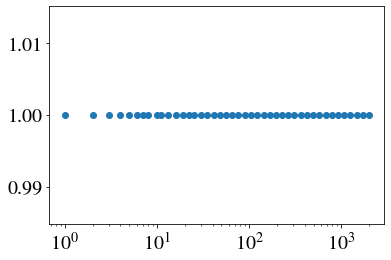

In [23]:
num = 50
Tlist = sorted(list(set(np.logspace(np.log10(2000),np.log10(1), num, dtype = int))))
print(T)
plt.scatter(Tlist, len(Tlist)*[1])
plt.xscale("log")

In [26]:
#Run Objects
for n in N:
    for s in S:
        for g in gamma:
            for rep in range(10):
                filepath ="data/SF/SF_n"+str(n)+"_g"+ "{}".format(g)+"_T"+str(T)+"_s"+str(s)+"_rep"+str(rep)
                objname = "SF/SF_n"+str(n)+"_g"+ "{}".format(g)+"_T"+str(T)+"_s"+str(s)+"_rep"+str(rep)
                STN= SubTempNet(filepath,objname,directed= False, init = False)
                STN.run(*Tlist,  maxsamp = 30, minsamp = 5)
                for PA in ["PA0","PAT","PAT2","PAT4","PAT8","PAT_LCC"]:
                    for key,val in STN[PA].items():
                        try:
                            Results[g][PA][key] += val
                        except:
                            Results[g][PA][key] = val
                STN.save()
STN.save_obj(Results, "SF_Results")

Done with samplelengths  [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 16, 19, 22, 25, 30, 35, 41, 48, 56, 65, 76, 89, 104, 122, 143, 167, 195, 227, 266, 310, 363, 423, 495, 578, 675, 788, 920, 1075, 1255, 1466, 1712]
Analyzing sample number 5 for samplelength  2000 and  8 slices


In [27]:
STN.save_obj(Results, "SF_Results")

In [ ]:
Results = STN.load_obj("SF_Results")

C:\ProgramData\Anaconda3\lib\site-packages\numpy\ma\core.py:6666: RuntimeWarning: underflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


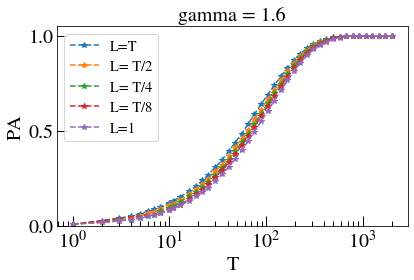

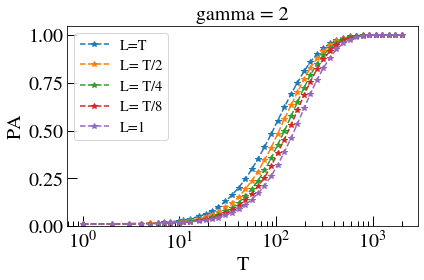

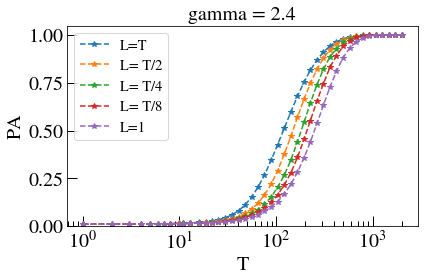

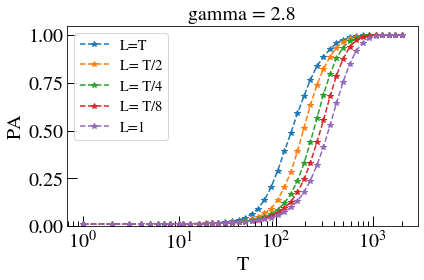

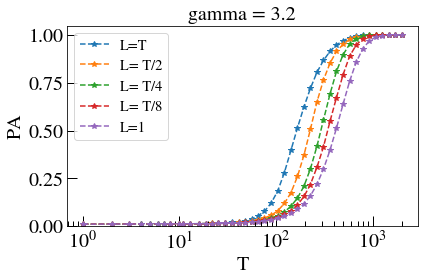

In [28]:
s=100**2
for g in [1.6,2,2.4,2.8,3.2]:
        fig, ax = plt.subplots()
        ax.set_xscale("log")
        ax.set_yscale("linear")
        ax.set_ylabel("PA")  
        ax.set_xlabel("T")
        linestyle = "--*"
    #for PA in ["PA0","PAT","PAT2","PAT4","PAT8","PAT_LCC"]:
        x = list([key for key,val in Results[g]["PAT"].items()])
        PAT =  list([np.mean(y)/s for t,y in Results[g]["PAT"].items()])
        x,PAT= zip(*sorted(zip(*(x,PAT))))
        plt.plot(x,PAT, linestyle, label = "L=T")
        
        x = list([key for key,val in Results[g]["PAT2"].items()])
        PAT2 = list([np.mean(y)/s for t,y in Results[g]["PAT2"].items()])
        x,PAT2= zip(*sorted(zip(*(x,PAT2))))
        plt.plot(x,PAT2, linestyle, label = "L= T/2")
        
        x = list([key for key,val in Results[g]["PAT4"].items()])
        PAT4 = list([np.mean(y)/s for t,y in Results[g]["PAT4"].items()])
        x,PAT4= zip(*sorted(zip(*(x,PAT4))))
        plt.plot(x,PAT4, linestyle, label = "L= T/4")
        
        x = list([key for key,val in Results[g]["PAT8"].items()])
        PAT8 = list([np.mean(y)/s for t,y in Results[g]["PAT8"].items()])
        x,PAT8= zip(*sorted(zip(*(x,PAT8))))
        plt.plot(x,PAT8, linestyle, label = "L= T/8")  
        
        x = list([key for key,val in Results[g]["PA0"].items()])
        PA0 =  list([np.mean(y)/s for t,y in Results[g]["PA0"].items()])
        x,PA0= zip(*sorted(zip(*(x,PA0))))
        plt.plot(x,PA0, linestyle, label = "L=1")
        
        #LCC
        if False:
            s=100**2
            x = list([key for key,val in Results[g]["PAT"].items()])
            PAT_LCC =  list([(np.mean(LCC)**2)/s for t,LCC in Results[g]["PAT_LCC"].items()])
            x,PAT_LCC= zip(*sorted(zip(*(x,PAT_LCC))))
            plt.plot(x,PAT_LCC, linestyle, label = "LCC")
        
        ax.legend()
        ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=20, direction='in')
        ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=20, direction='in')
        ax.set_title("gamma = "+str(g))
        ax.set_ylim(0, ax.set_ylim()[1])
        fig.tight_layout()
        fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


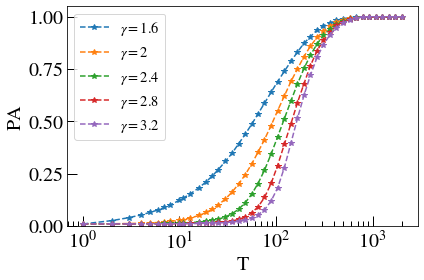

In [42]:
s=100**2
fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_yscale("linear")
ax.set_ylabel("PA")  
ax.set_xlabel("T")
linestyle = "--*"
for g in [1.6,2,2.4,2.8,3.2]:
    #for PA in ["PA0","PAT","PAT2","PAT4","PAT8","PAT_LCC"]:
    
        x = list([key for key,val in Results[g]["PAT"].items()])
        PAT =  list([np.mean(y)/s for t,y in Results[g]["PAT"].items()])
        x,PAT= zip(*sorted(zip(*(x,PAT))))
        plt.plot(x,PAT, linestyle, label = r'$\gamma =$'+str(g))
        """
        x = list([key for key,val in Results[g]["PAT2"].items()])
        PAT2 = list([np.mean(y)/s for t,y in Results[g]["PAT2"].items()])
        x,PAT2= zip(*sorted(zip(*(x,PAT2))))
        plt.plot(x,PAT2, linestyle, label = "L= T/2")
        
        x = list([key for key,val in Results[g]["PAT4"].items()])
        PAT4 = list([np.mean(y)/s for t,y in Results[g]["PAT4"].items()])
        x,PAT4= zip(*sorted(zip(*(x,PAT4))))
        plt.plot(x,PAT4, linestyle, label = "L= T/4")
        
        x = list([key for key,val in Results[g]["PAT8"].items()])
        PAT8 = list([np.mean(y)/s for t,y in Results[g]["PAT8"].items()])
        x,PAT8= zip(*sorted(zip(*(x,PAT8))))
        plt.plot(x,PAT8, linestyle, label = "L= T/8")  
        
        x = list([key for key,val in Results[g]["PA0"].items()])
        PA0 =  list([np.mean(y)/s for t,y in Results[g]["PA0"].items()])
        x,PA0= zip(*sorted(zip(*(x,PA0))))
        plt.plot(x,PA0, linestyle, label = "L=1")
        """
        #LCC
        if False:
            s=100**2
            x = list([key for key,val in Results[g]["PAT"].items()])
            PAT_LCC =  list([(np.mean(LCC)**2)/s for t,LCC in Results[g]["PAT_LCC"].items()])
            x,PAT_LCC= zip(*sorted(zip(*(x,PAT_LCC))))
            plt.plot(x,PAT_LCC, linestyle, label = "LCC")
        
ax.legend()
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=20, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=20, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
fig.tight_layout()
fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


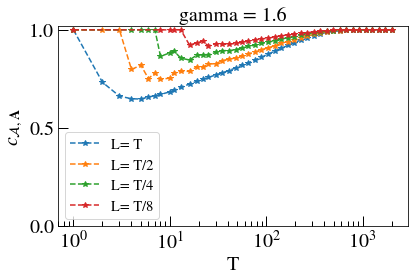

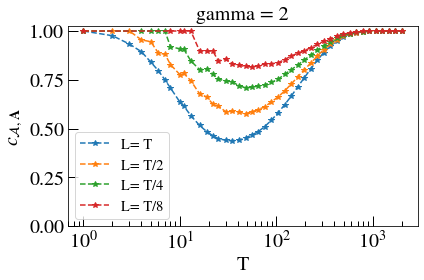

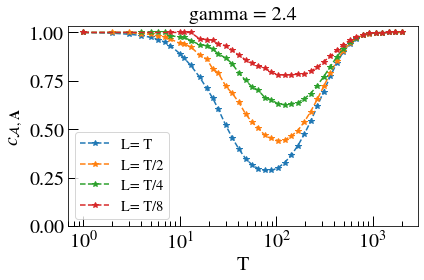

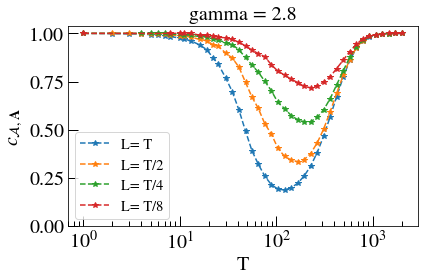

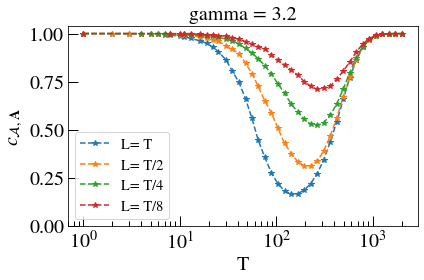

In [29]:
s=100**2
for g in [1.6,2,2.4,2.8,3.2]:
        fig, ax = plt.subplots()
        ax.set_xscale("log")
        ax.set_yscale("linear")
        ax.set_ylabel(r'$c_{\mathcal{A},\mathbf{A}}$')
        ax.set_xlabel("T")
        linestyle = "--*"
        
        PA0 =  {t:np.mean(y) for t,y in Results[g]["PA0"].items()}

        x = list([key for key,val in Results[g]["PAT"].items()])
        PAT =  list([PA0[t]/np.mean(Results[g]["PAT"][t]) for t in x])
        x,PAT= zip(*sorted(zip(*(x,PAT))))
        ax.plot(x,PAT,linestyle, label = "L= T")

        x = list([key for key,val in Results[g]["PAT2"].items()])
        PAT2 = list([PA0[t]/np.mean(Results[g]["PAT2"][t]) for t in x])
        x,PAT2= zip(*sorted(zip(*(x,PAT2))))
        ax.plot(x,PAT2, linestyle, label = "L= T/2")
        
        x = list([key for key,val in Results[g]["PAT4"].items()])
        PAT4 = list([PA0[t]/np.mean(Results[g]["PAT4"][t]) for t in x])
        x,PAT4= zip(*sorted(zip(*(x,PAT4))))
        ax.plot(x,PAT4,linestyle, label = "L= T/4")
        
        x = list([key for key,val in Results[g]["PAT8"].items()])
        PAT8 = list([PA0[t]/np.mean(Results[g]["PAT8"][t]) for t in x])
        x,PAT8= zip(*sorted(zip(*(x,PAT8))))
        ax.plot(x,PAT8,linestyle, label = "L= T/8")
        ax.set_title("gamma = "+str(g))
        ax.legend()
        ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=20, direction='in')
        ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=20, direction='in')
        ax.set_ylim(0, ax.set_ylim()[1])
        fig.tight_layout()
        fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


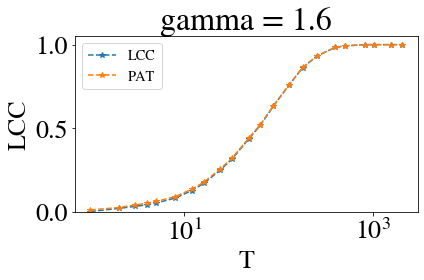

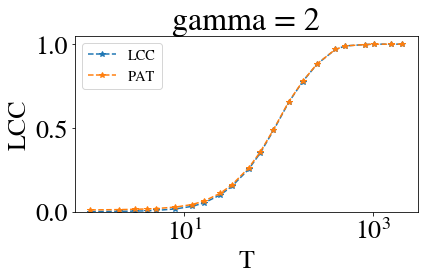

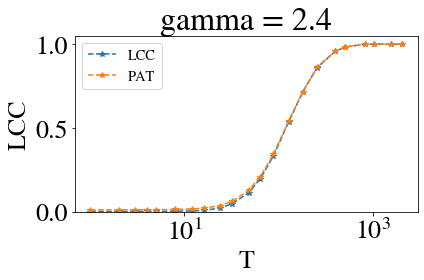

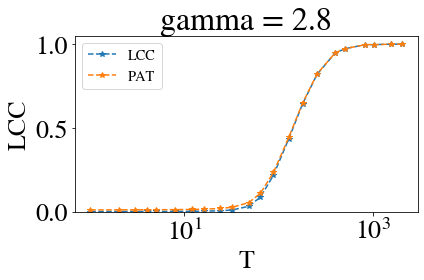

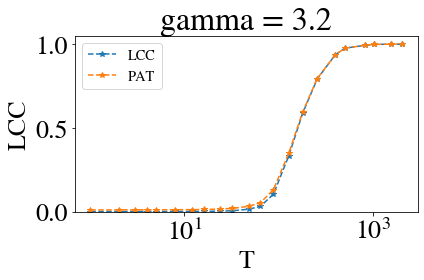

In [76]:
s=100**2
for g in [1.6,2,2.4,2.8,3.2]:
        fig, ax = plt.subplots()
        ax.set_xscale("log")
        ax.set_yscale("linear")
        ax.set_ylabel("LCC")  
        ax.set_xlabel("T")
        linestyle = "--*"
        
        s=100**2
        x = list([key for key,val in Results[g]["PAT"].items()])
        PAT_LCC =  list([(np.mean(LCC)**2)/s for t,LCC in Results[g]["PAT_LCC"].items()])
        x,PAT_LCC= zip(*sorted(zip(*(x,PAT_LCC))))
        plt.plot(x,PAT_LCC, linestyle, label = "LCC")
        
        if True:
            x = list([key for key,val in Results[g]["PAT"].items()])
            PAT =  list([((np.mean(y))/s)**1 for t,y in Results[g]["PAT"].items()])
            #PAT =  list([((np.mean(y))/s)**1 for t,y in self["PAT"].items()])
            x,PAT= zip(*sorted(zip(*(x,PAT))))
            plt.plot(x,PAT, linestyle, label = "PAT")        
        
        ax.set_title("gamma = "+str(g))
        ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=20, direction='in')
        ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=20, direction='in')
        ax.legend()
        ax.set_ylim(0, ax.set_ylim()[1])
        fig.tight_layout()
        fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


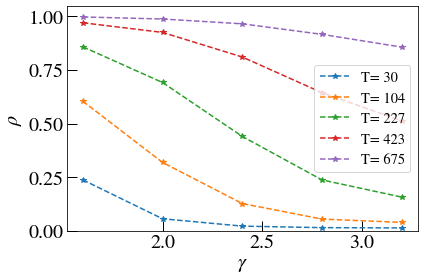

In [48]:
fig, ax = plt.subplots()
ax.set_xscale("linear")
ax.set_yscale("linear")
ax.set_ylabel(r'$\rho$')
ax.set_xlabel(r'$\gamma$')
linestyle = "--*"
x = list([key for key,val in Results[g]["PAT"].items()])
for t in [x[15],x[23],x[28],x[32],x[35]]:
    x=[]
    y=[]
    for g in [1.6,2,2.4,2.8,3.2]:
        x.append(g)
        y.append(np.mean(Results[g]["PA0"][t])/10000)
    ax.plot(x,y, linestyle, label = "T= "+str(t))
ax.legend()
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=20, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=20, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
fig.tight_layout()
fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


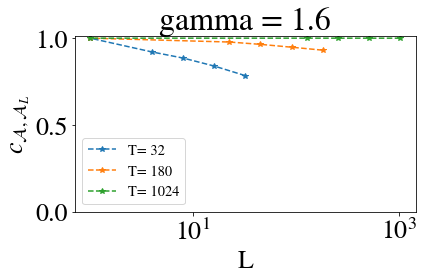

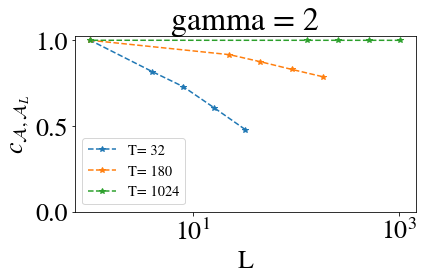

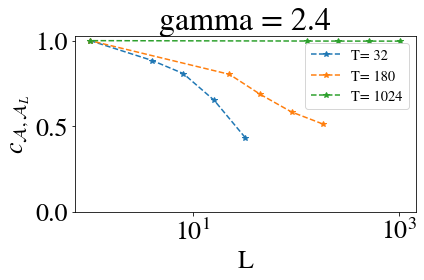

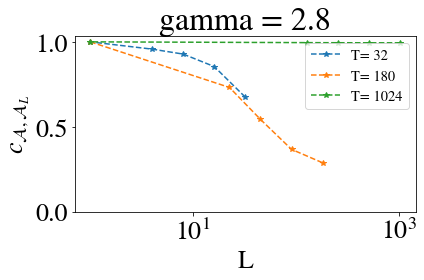

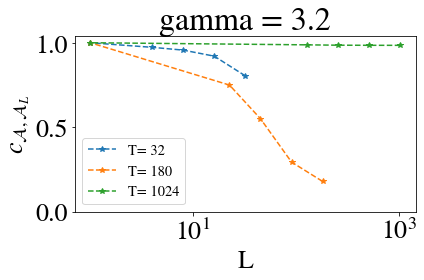

In [74]:
fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_yscale("linear")
ax.set_ylabel(r'$c_{\mathcal{A},\mathcal{A}_L}$')
ax.set_xlabel("L")
linestyle = "--*"
for t in [x[5],x[10],x[15]]:
    x=[]
    y=[]
    for g in [1.6,2,2.4,2.8,3.2]:
        x.append(g)
        y.append(np.mean(Results[g]["PA0"][t]))
                
    
        ax.scatter([t,t/2,t/4,t/8, 1],[np.mean(Results[g]["PA0"][t])/np.mean(Results[g]["PAT"][t]),
                                                        np.mean(Results[g]["PA0"][t])/np.mean(Results[g]["PAT2"][t]),
                                                        np.mean(Results[g]["PA0"][t])/np.mean(Results[g]["PAT4"][t]),
                                                        np.mean(Results[g]["PA0"][t])/np.mean(Results[g]["PAT8"][t]),
                                                        1],
                        linestyle, label = "T= "+str(t))
            ax.legend()
            ax.set_ylim(0, ax.set_ylim()[1])
            fig.tight_layout()
            fig.show()